In [65]:
import networkx as nx
from pyvis.network import Network
import community
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from latex import latexify
latexify(columns = 2)

%matplotlib inline
%config InlineBackend.figure_format = "retina"

# **Zachary's Karate Club**

In [60]:
G = nx.karate_club_graph()

# nt = Network(height = "1080px", width = "100%", notebook = True, cdn_resources = "remote")

for node in G.nodes:
    G.nodes[node]["label"] = str(node)
    if G.nodes[node]["club"] == "Mr. Hi":
        G.nodes[node]["color"] = "blue"
    else:
        G.nodes[node]["color"] = "red"

# nt.from_nx(G)
# nt.show("karate.html")

print("Number of nodes: ", G.number_of_nodes())
print("Number of edges: ", G.number_of_edges())
print("Average degree: ", np.mean([d for n, d in G.degree()]))
print("Clustering coefficient: ", nx.average_clustering(G))
print("Average shortest path length: ", nx.average_shortest_path_length(G))
print("Modularity: ", community.modularity(community.best_partition(G), G))
print("Number of communities: ", len(set(community.best_partition(G).values())))
print("Community sizes: ", pd.Series(list(community.best_partition(G).values())).value_counts().sort_index().values)

Number of nodes:  34
Number of edges:  78
Average degree:  4.588235294117647
Clustering coefficient:  0.5706384782076823
Average shortest path length:  2.408199643493761
Modularity:  0.4276718952043627
Number of communities:  3
Community sizes:  [11  6  5 12]


In [63]:
dit = nx.edge_betweenness_centrality(G)
edges_tuples = sorted(dit.items(), key = lambda x: x[1], reverse = True)
print(edges_tuples[:5])

[((0, 31), 0.1272599949070537), ((0, 6), 0.07813428401663695), ((0, 5), 0.07813428401663694), ((0, 2), 0.0777876807288572), ((0, 8), 0.07423959482783014)]


In [64]:
ccomp = nx.connected_components(G)
print("Number of connected components: ", nx.number_connected_components(G))

Number of connected components:  1


<generator object connected_components at 0x330510c10>

# $$ \text{Girvan-Newman Algorithm} $$
$$ \text{Based upon the edge-betweenness} \to $$
$$ \text{Fraction of the times an edge gets crossed in a shortest path traversal across all node pairs} $$

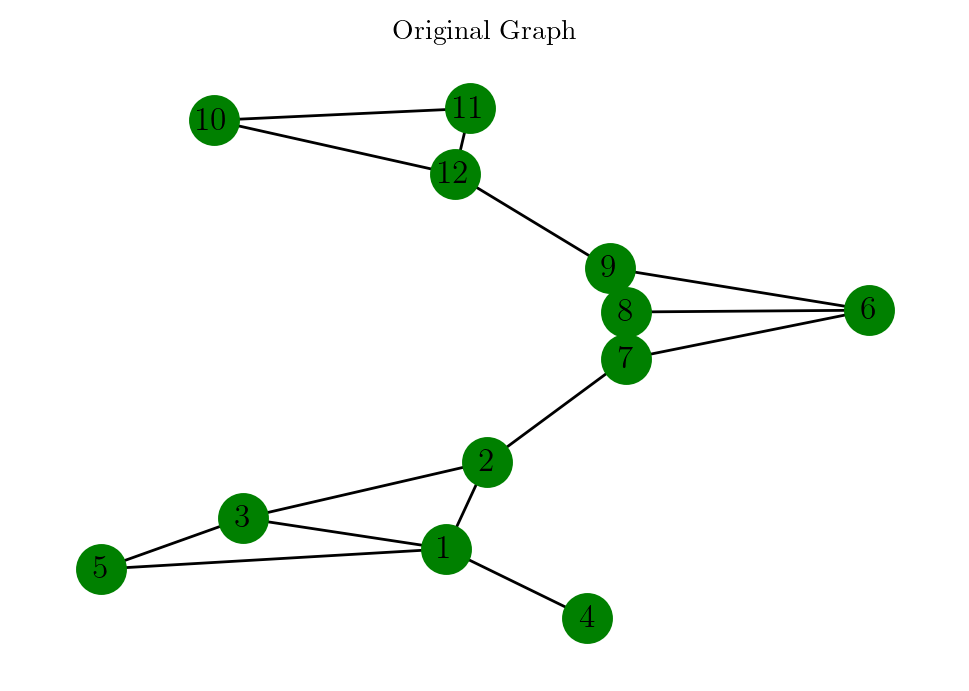

In [105]:
G = nx.Graph()
G.add_edges_from([[1, 2], [2, 3], [1, 3], [1, 4], [1, 5], [3, 5],
                  [6, 7], [7, 8], [8, 9], [6, 9], [6, 8], [7, 9],
                  [10, 11], [11, 12], [10, 12], 
                  [9, 12], [2, 7]])

plt.figure(figsize = (6, 4))
plt.title("Original Graph")
nx.draw(G, with_labels = True, node_color = "green", pos = nx.spring_layout(G, scale = 4), node_size = 300)

In [101]:
def plotEdgeBetweenness(G, title):
    edge_betweenness = list(nx.edge_betweenness_centrality(G).values())
    plt.figure(figsize = (10, 5))
    plt.title(title)
    plt.plot(edge_betweenness, marker = "o")

    for i, txt in enumerate(edge_betweenness):
        plt.annotate(f"{txt:.5f}", (i, edge_betweenness[i]))

    plt.xticks(range(len(edge_betweenness)), [f"({e[0]}, {e[1]})" for e in G.edges()], rotation = 90)
    plt.xlabel("Edges")
    plt.ylabel("Edge Betweenness")
    plt.show()

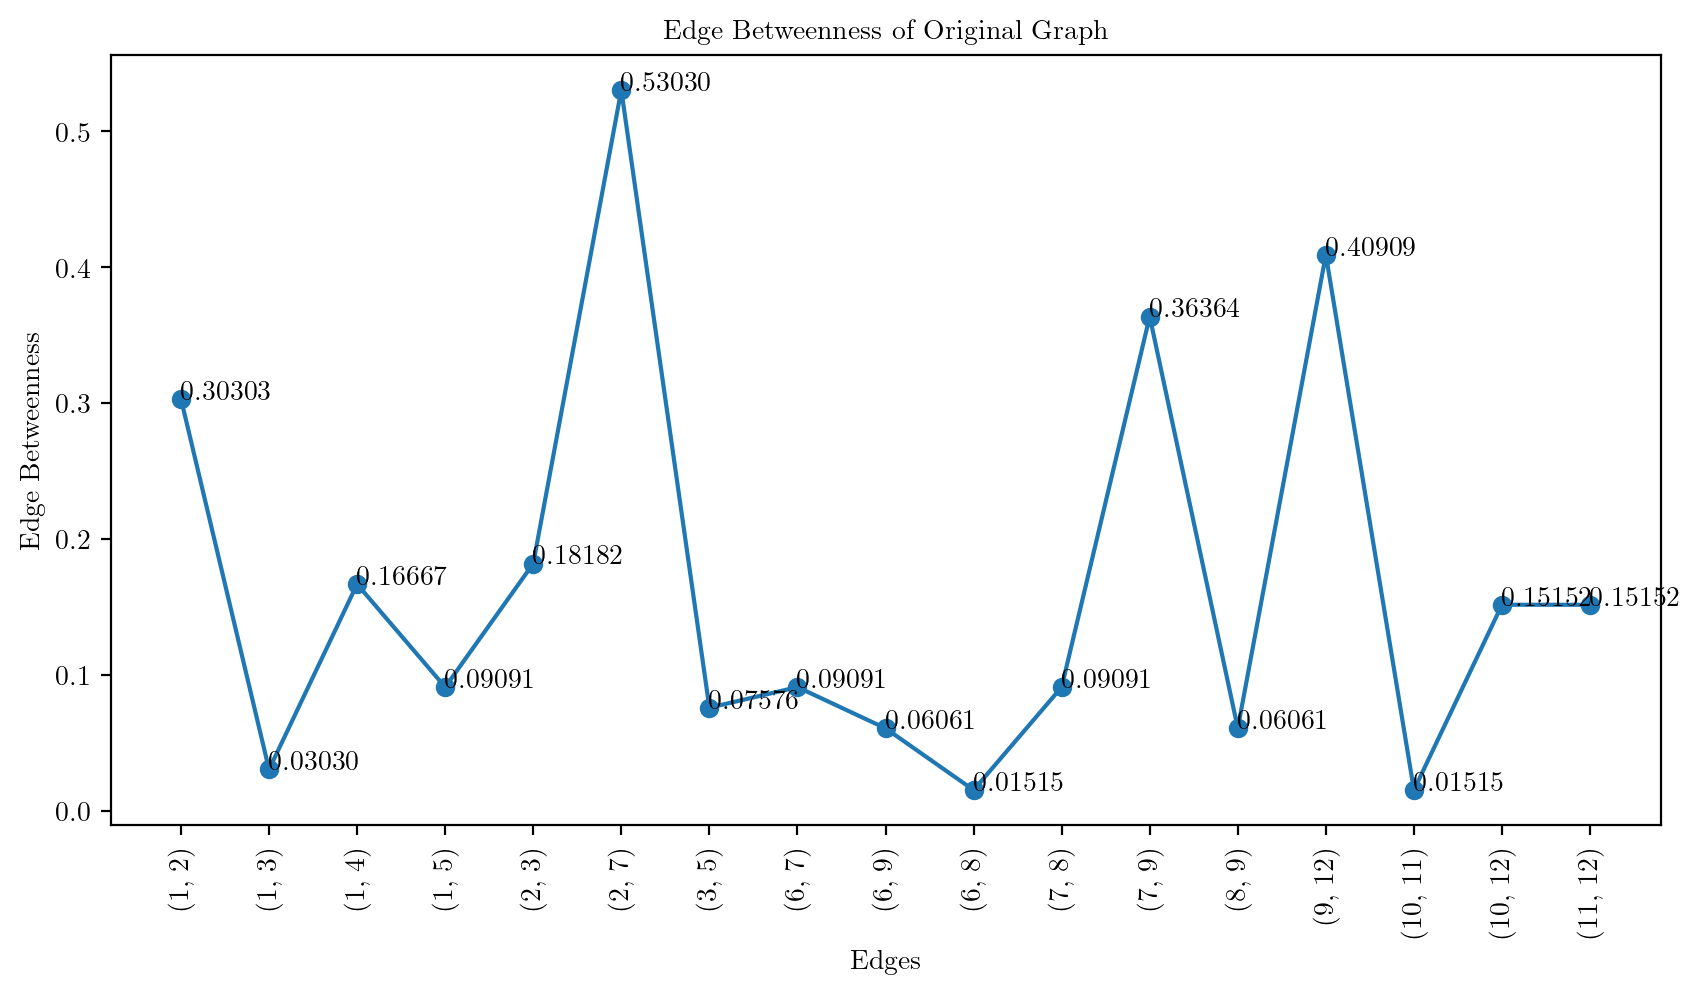

In [102]:
plotEdgeBetweenness(G, "Edge Betweenness of Original Graph")

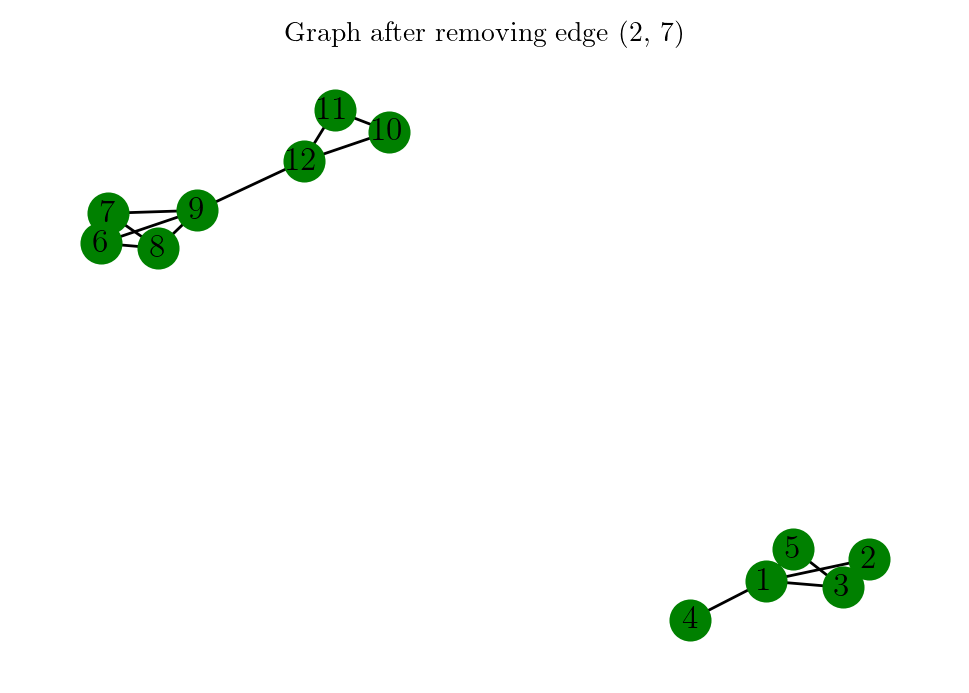

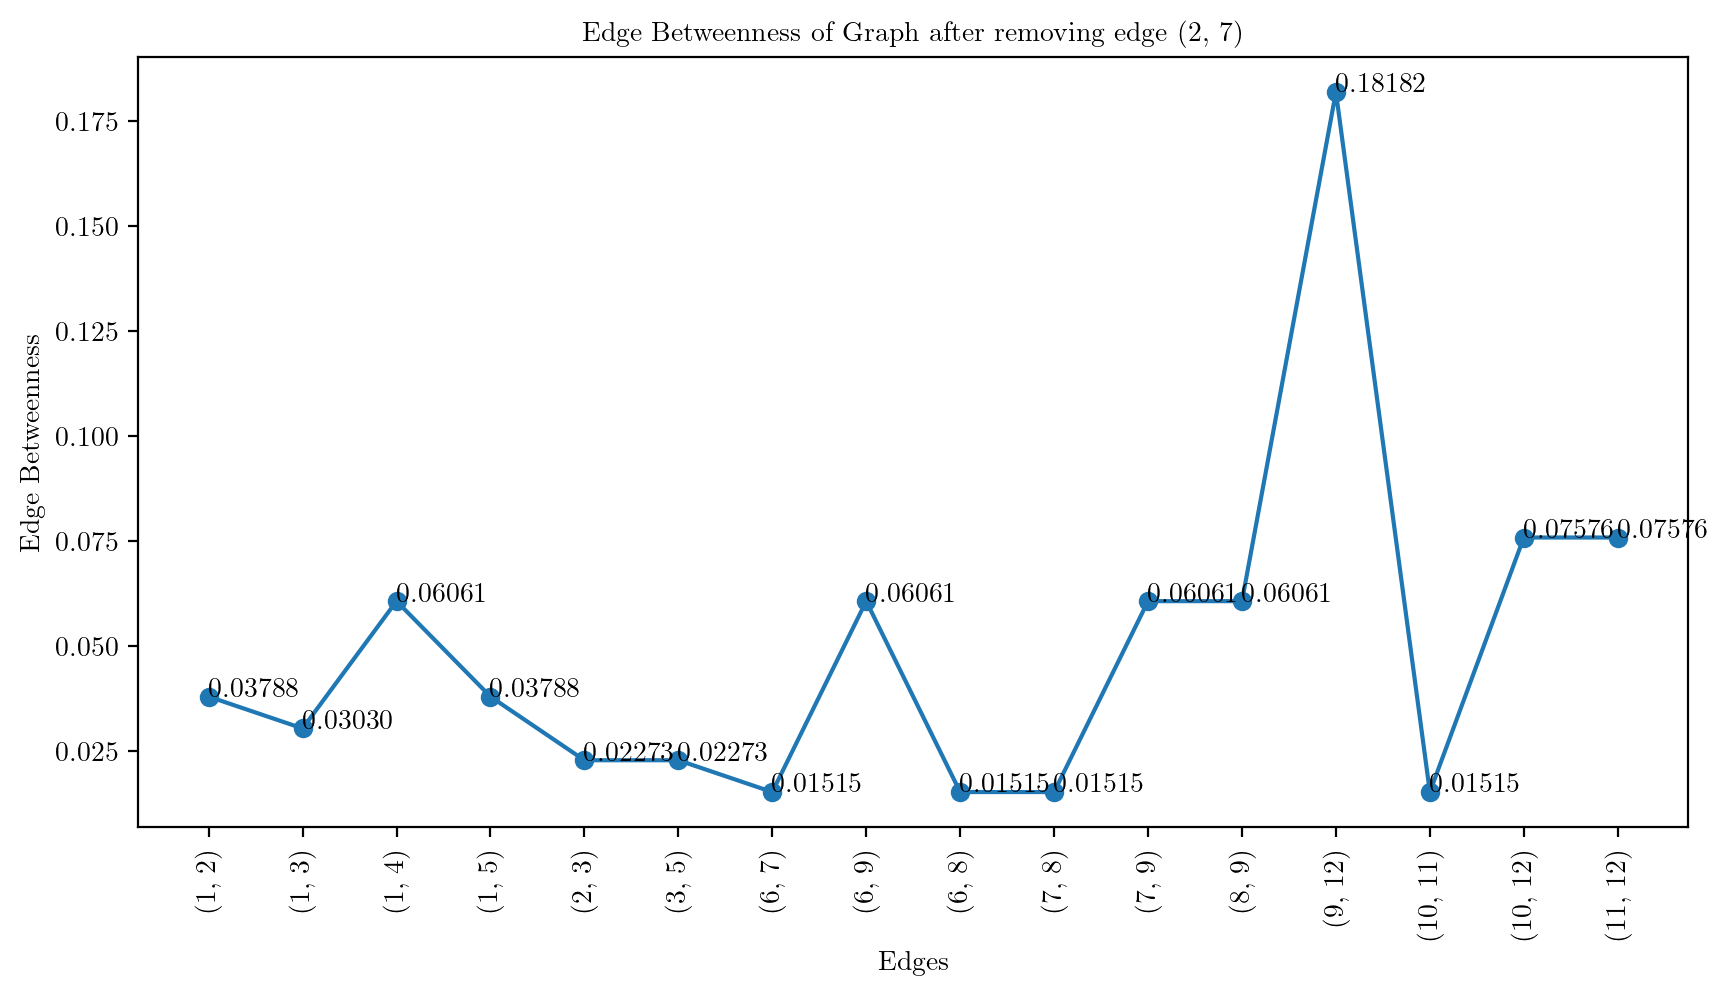

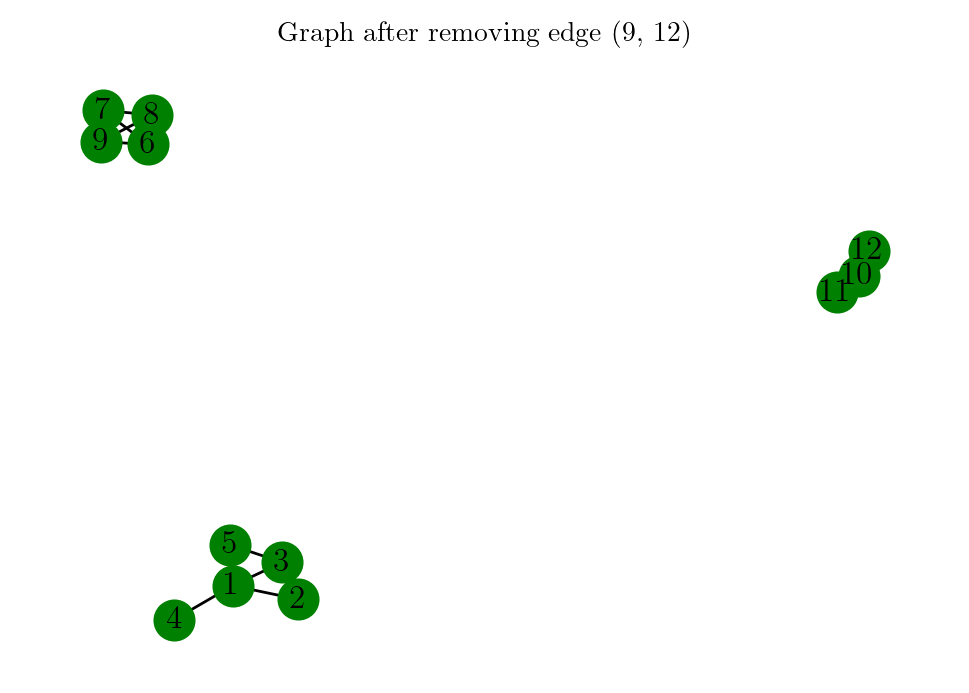

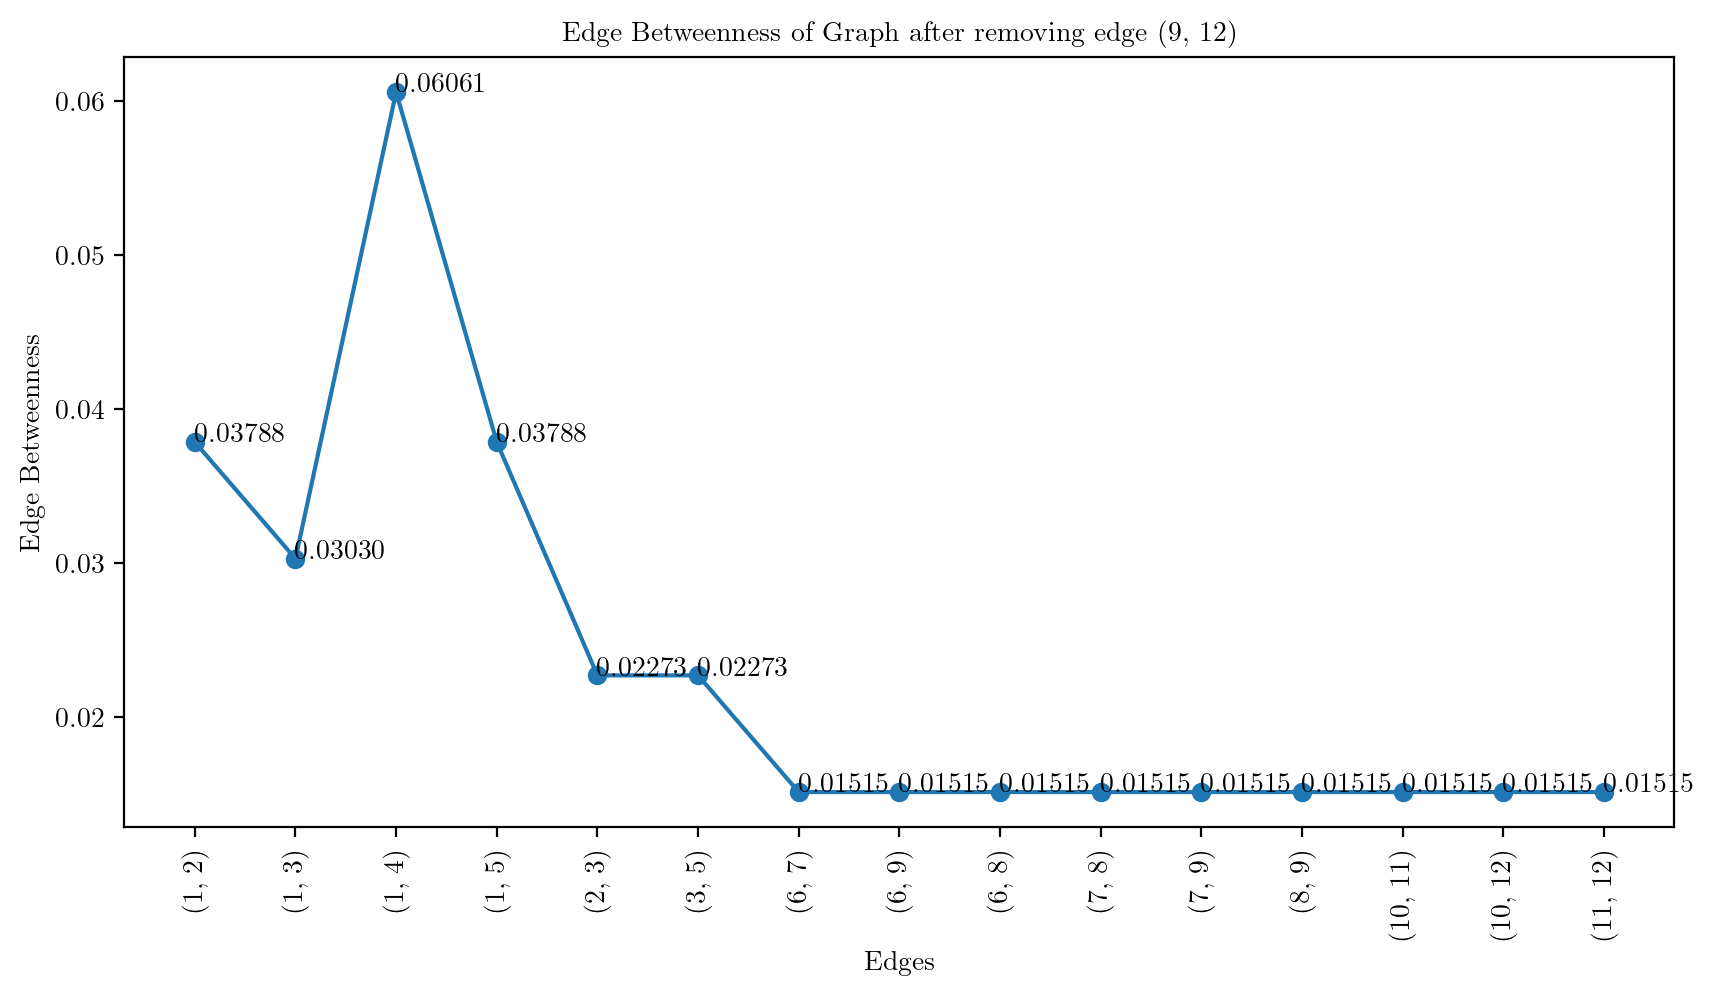

In [106]:
for i in range(2):
    edge_betweenness = nx.edge_betweenness_centrality(G)
    edge_to_remove = max(edge_betweenness, key = edge_betweenness.get)
    G.remove_edge(*edge_to_remove)
    plt.figure(figsize = (6, 4))
    plt.title(f"Graph after removing edge {edge_to_remove}")
    nx.draw(G, with_labels = True, node_color = "green", node_size = 200, pos = nx.spring_layout(G, scale = 4))
    plt.show()
    plotEdgeBetweenness(G, f"Edge Betweenness of Graph after removing edge {edge_to_remove}")

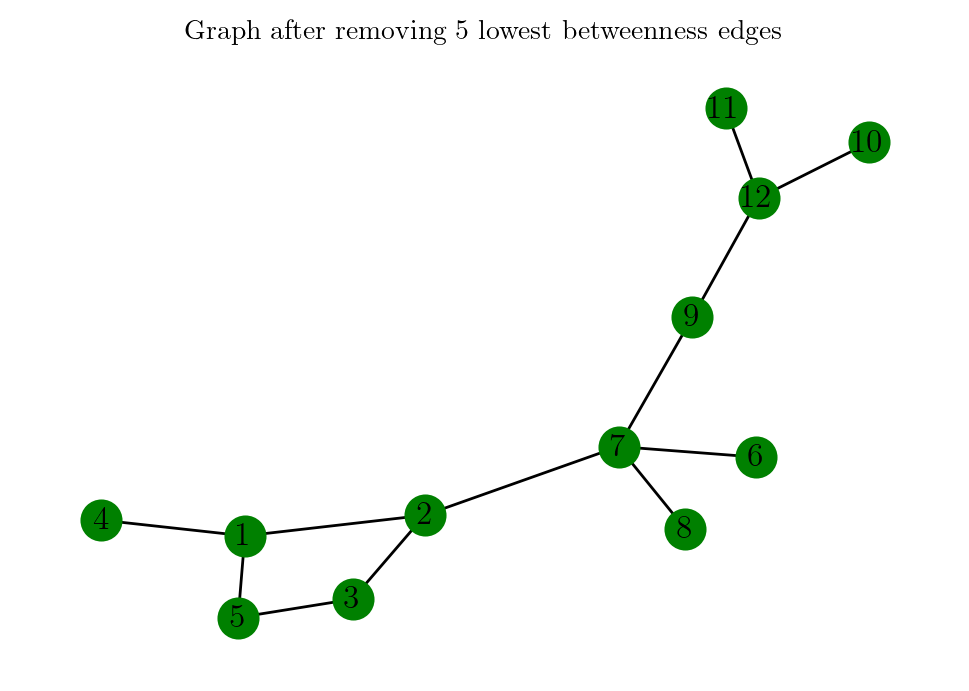

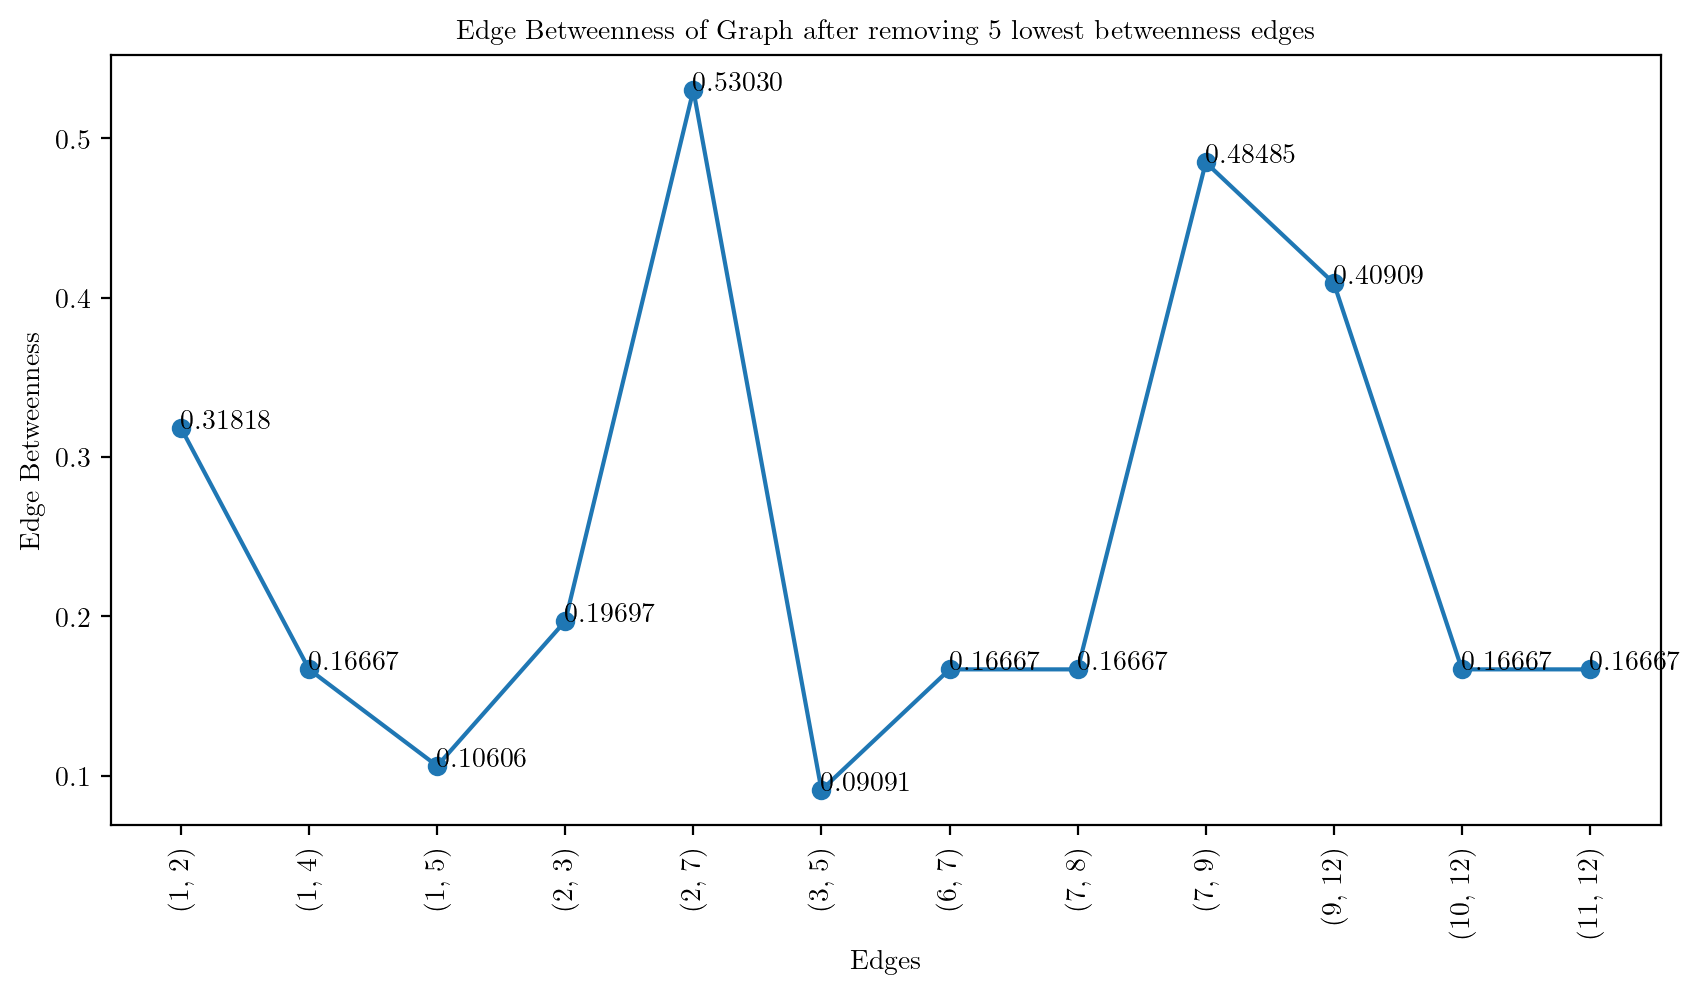

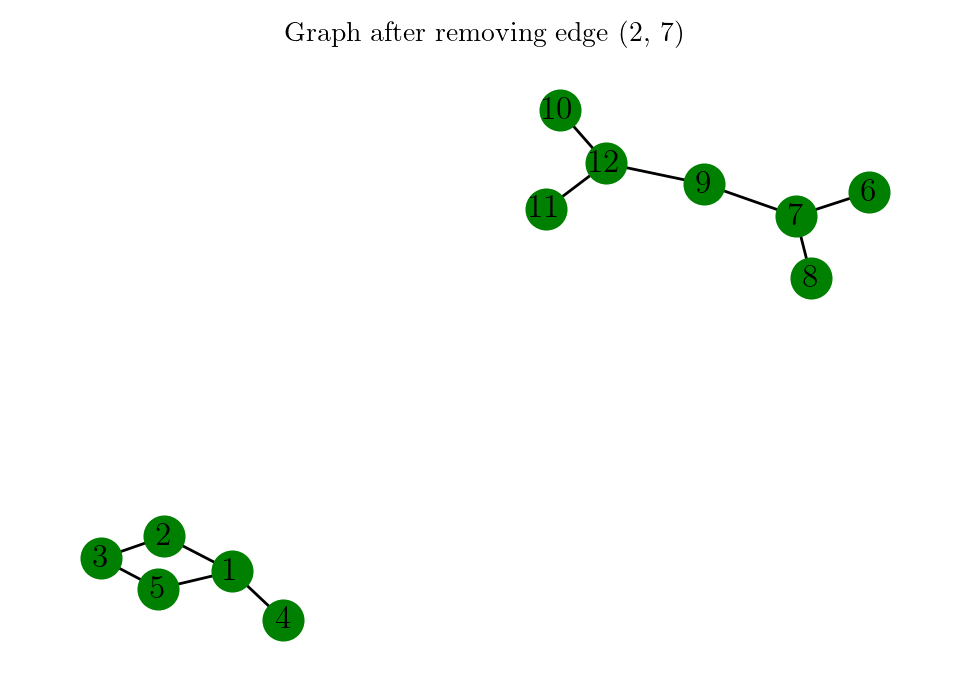

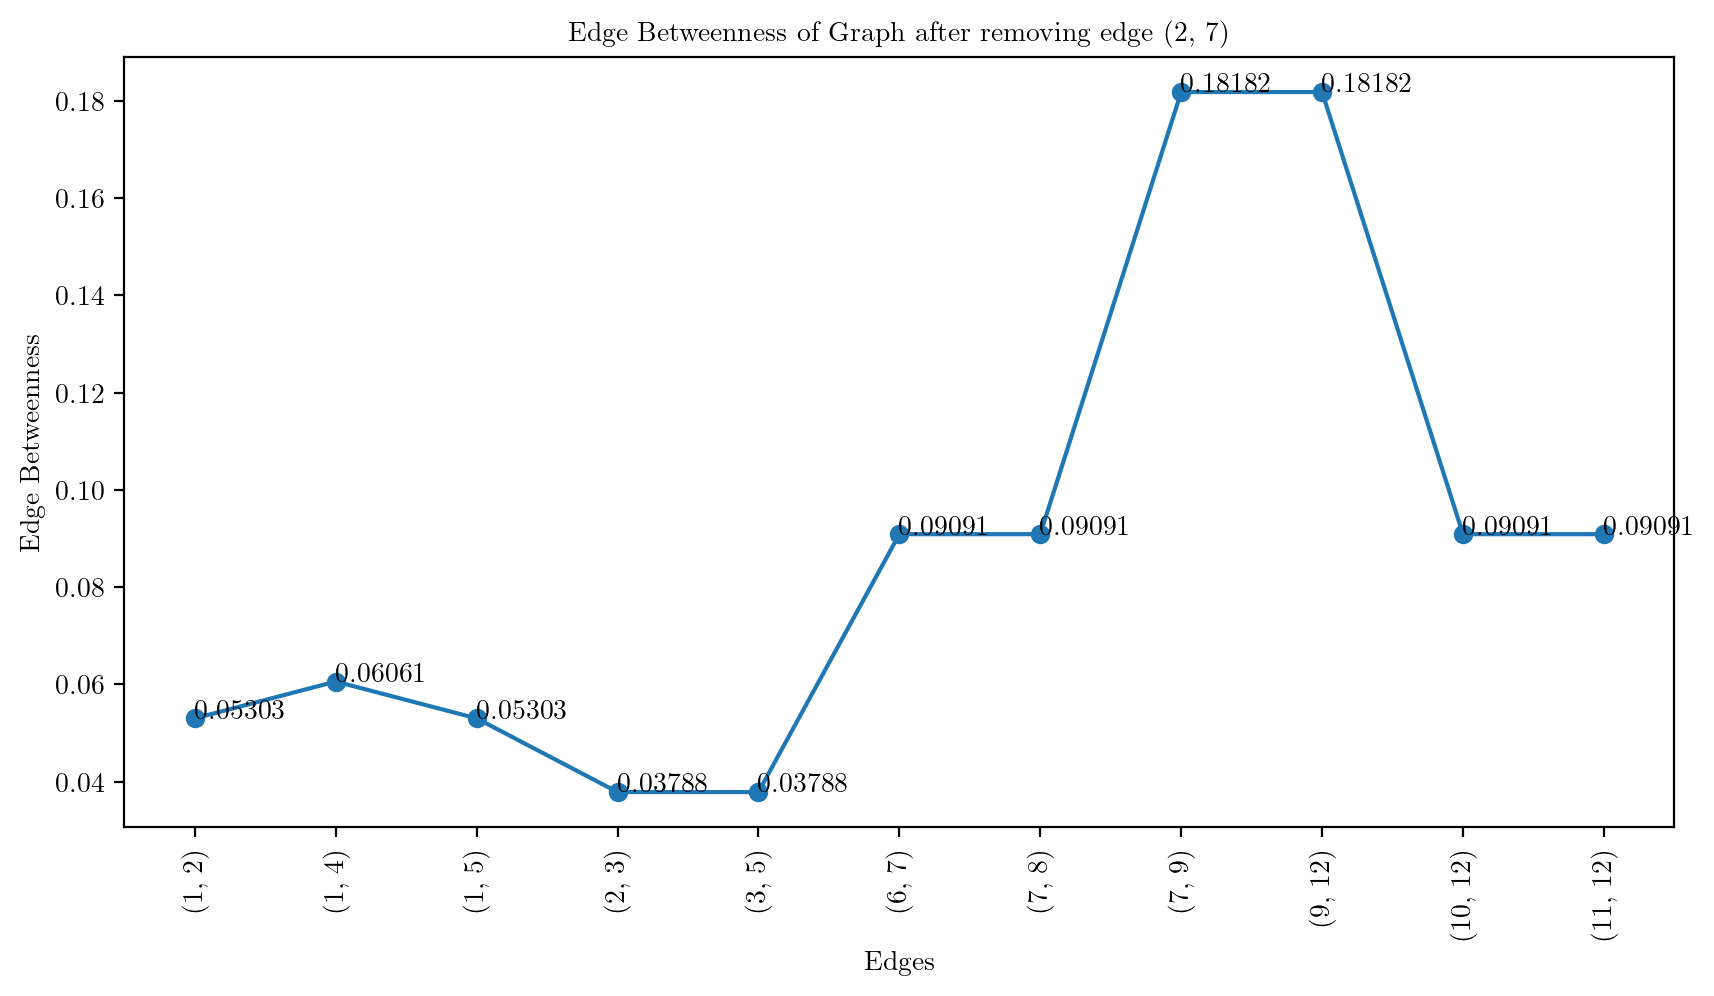

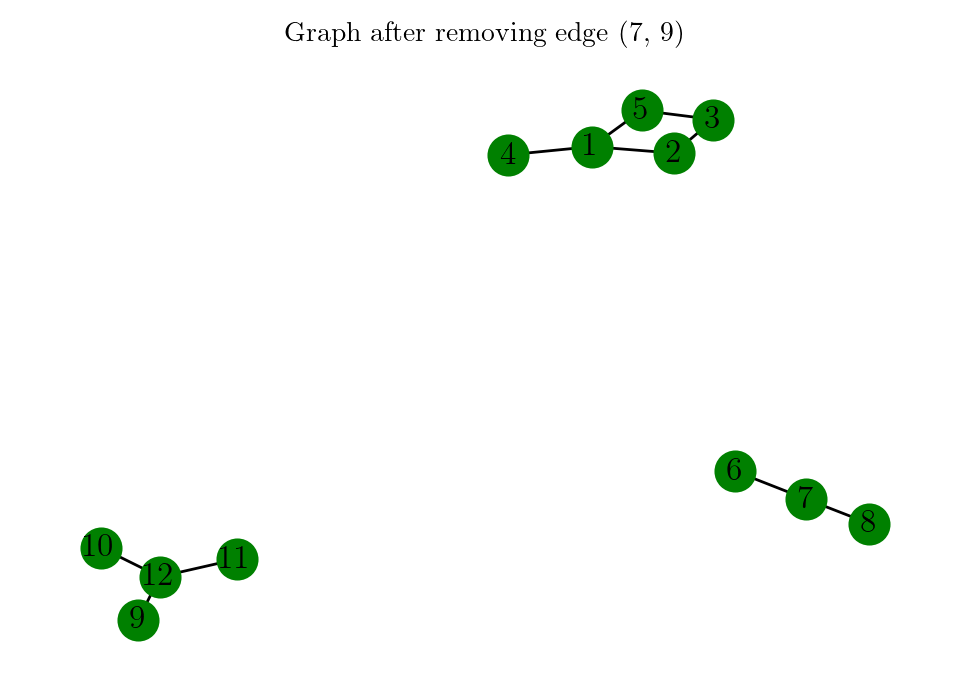

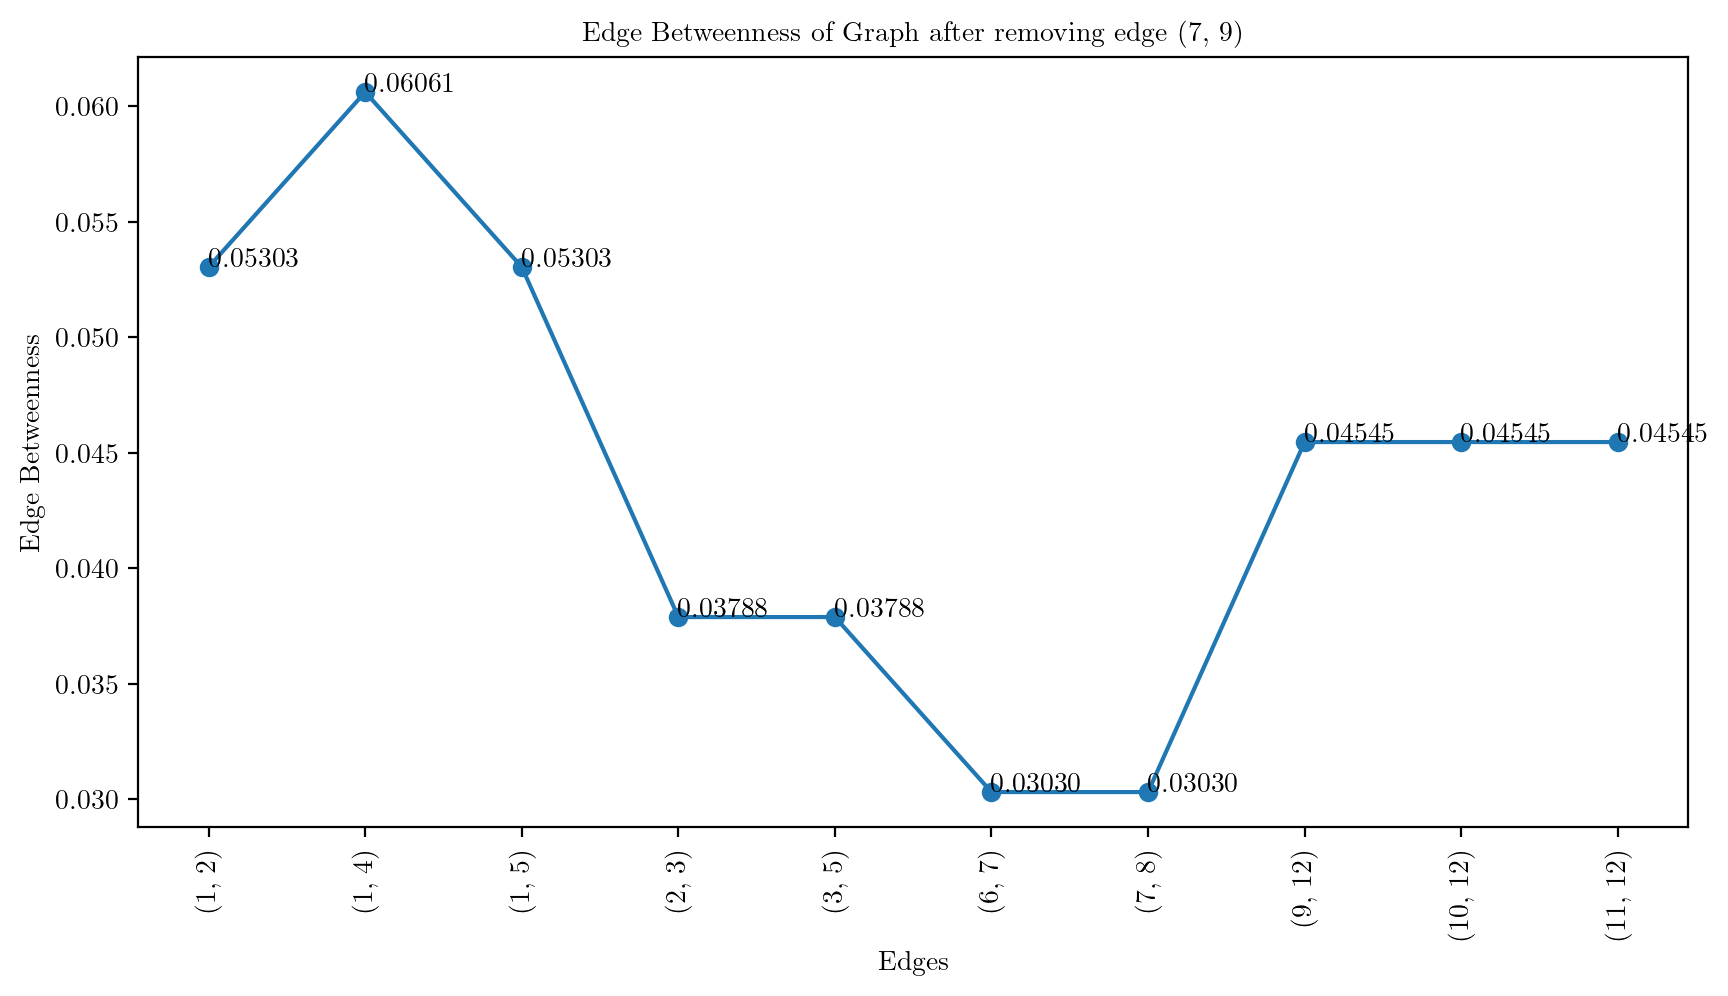

In [107]:
G = nx.Graph()
G.add_edges_from([[1, 2], [2, 3], [1, 3], [1, 4], [1, 5], [3, 5],
                  [6, 7], [7, 8], [8, 9], [6, 9], [6, 8], [7, 9],
                  [10, 11], [11, 12], [10, 12], 
                  [9, 12], [2, 7]])

edge_betweenness = nx.edge_betweenness_centrality(G)
edges_to_remove = sorted(edge_betweenness, key = edge_betweenness.get)[:5]
G.remove_edges_from(edges_to_remove)

plt.figure(figsize = (6, 4))
plt.title("Graph after removing 5 lowest betweenness edges")
nx.draw(G, with_labels = True, node_color = "green", node_size = 200, pos = nx.spring_layout(G, scale = 4))
plt.show()

plotEdgeBetweenness(G, "Edge Betweenness of Graph after removing 5 lowest betweenness edges")

for i in range(2):
    edge_betweenness = nx.edge_betweenness_centrality(G)
    edge_to_remove = max(edge_betweenness, key = edge_betweenness.get)
    G.remove_edge(*edge_to_remove)
    plt.figure(figsize = (6, 4))
    plt.title(f"Graph after removing edge {edge_to_remove}")
    nx.draw(G, with_labels = True, node_color = "green", node_size = 200, pos = nx.spring_layout(G, scale = 4))
    plt.show()
    plotEdgeBetweenness(G, f"Edge Betweenness of Graph after removing edge {edge_to_remove}")

## **Functions for Extracting Graph and Communities**

In [52]:
def loadGraph(path):
    G = nx.Graph()
    with open(path) as f:
        for line in f:
            if line.startswith("#"):
                continue
            u, v = map(int, line.strip().split("\t"))
            G.add_edge(u, v)
    return G

def loadCommunity(path):
    communities = {}
    with open(path) as f:
        for comm_id, line in enumerate(f):
            nodes = list(map(int, line.strip().split("\t")))
            for node in nodes:
                communities[node] = comm_id
    return communities

def combineGraph(G, community):
    for node, comm_id in community.items():
        if node in G.nodes():
            G.nodes[node]["community"] = comm_id
    return G

# **DBLP**

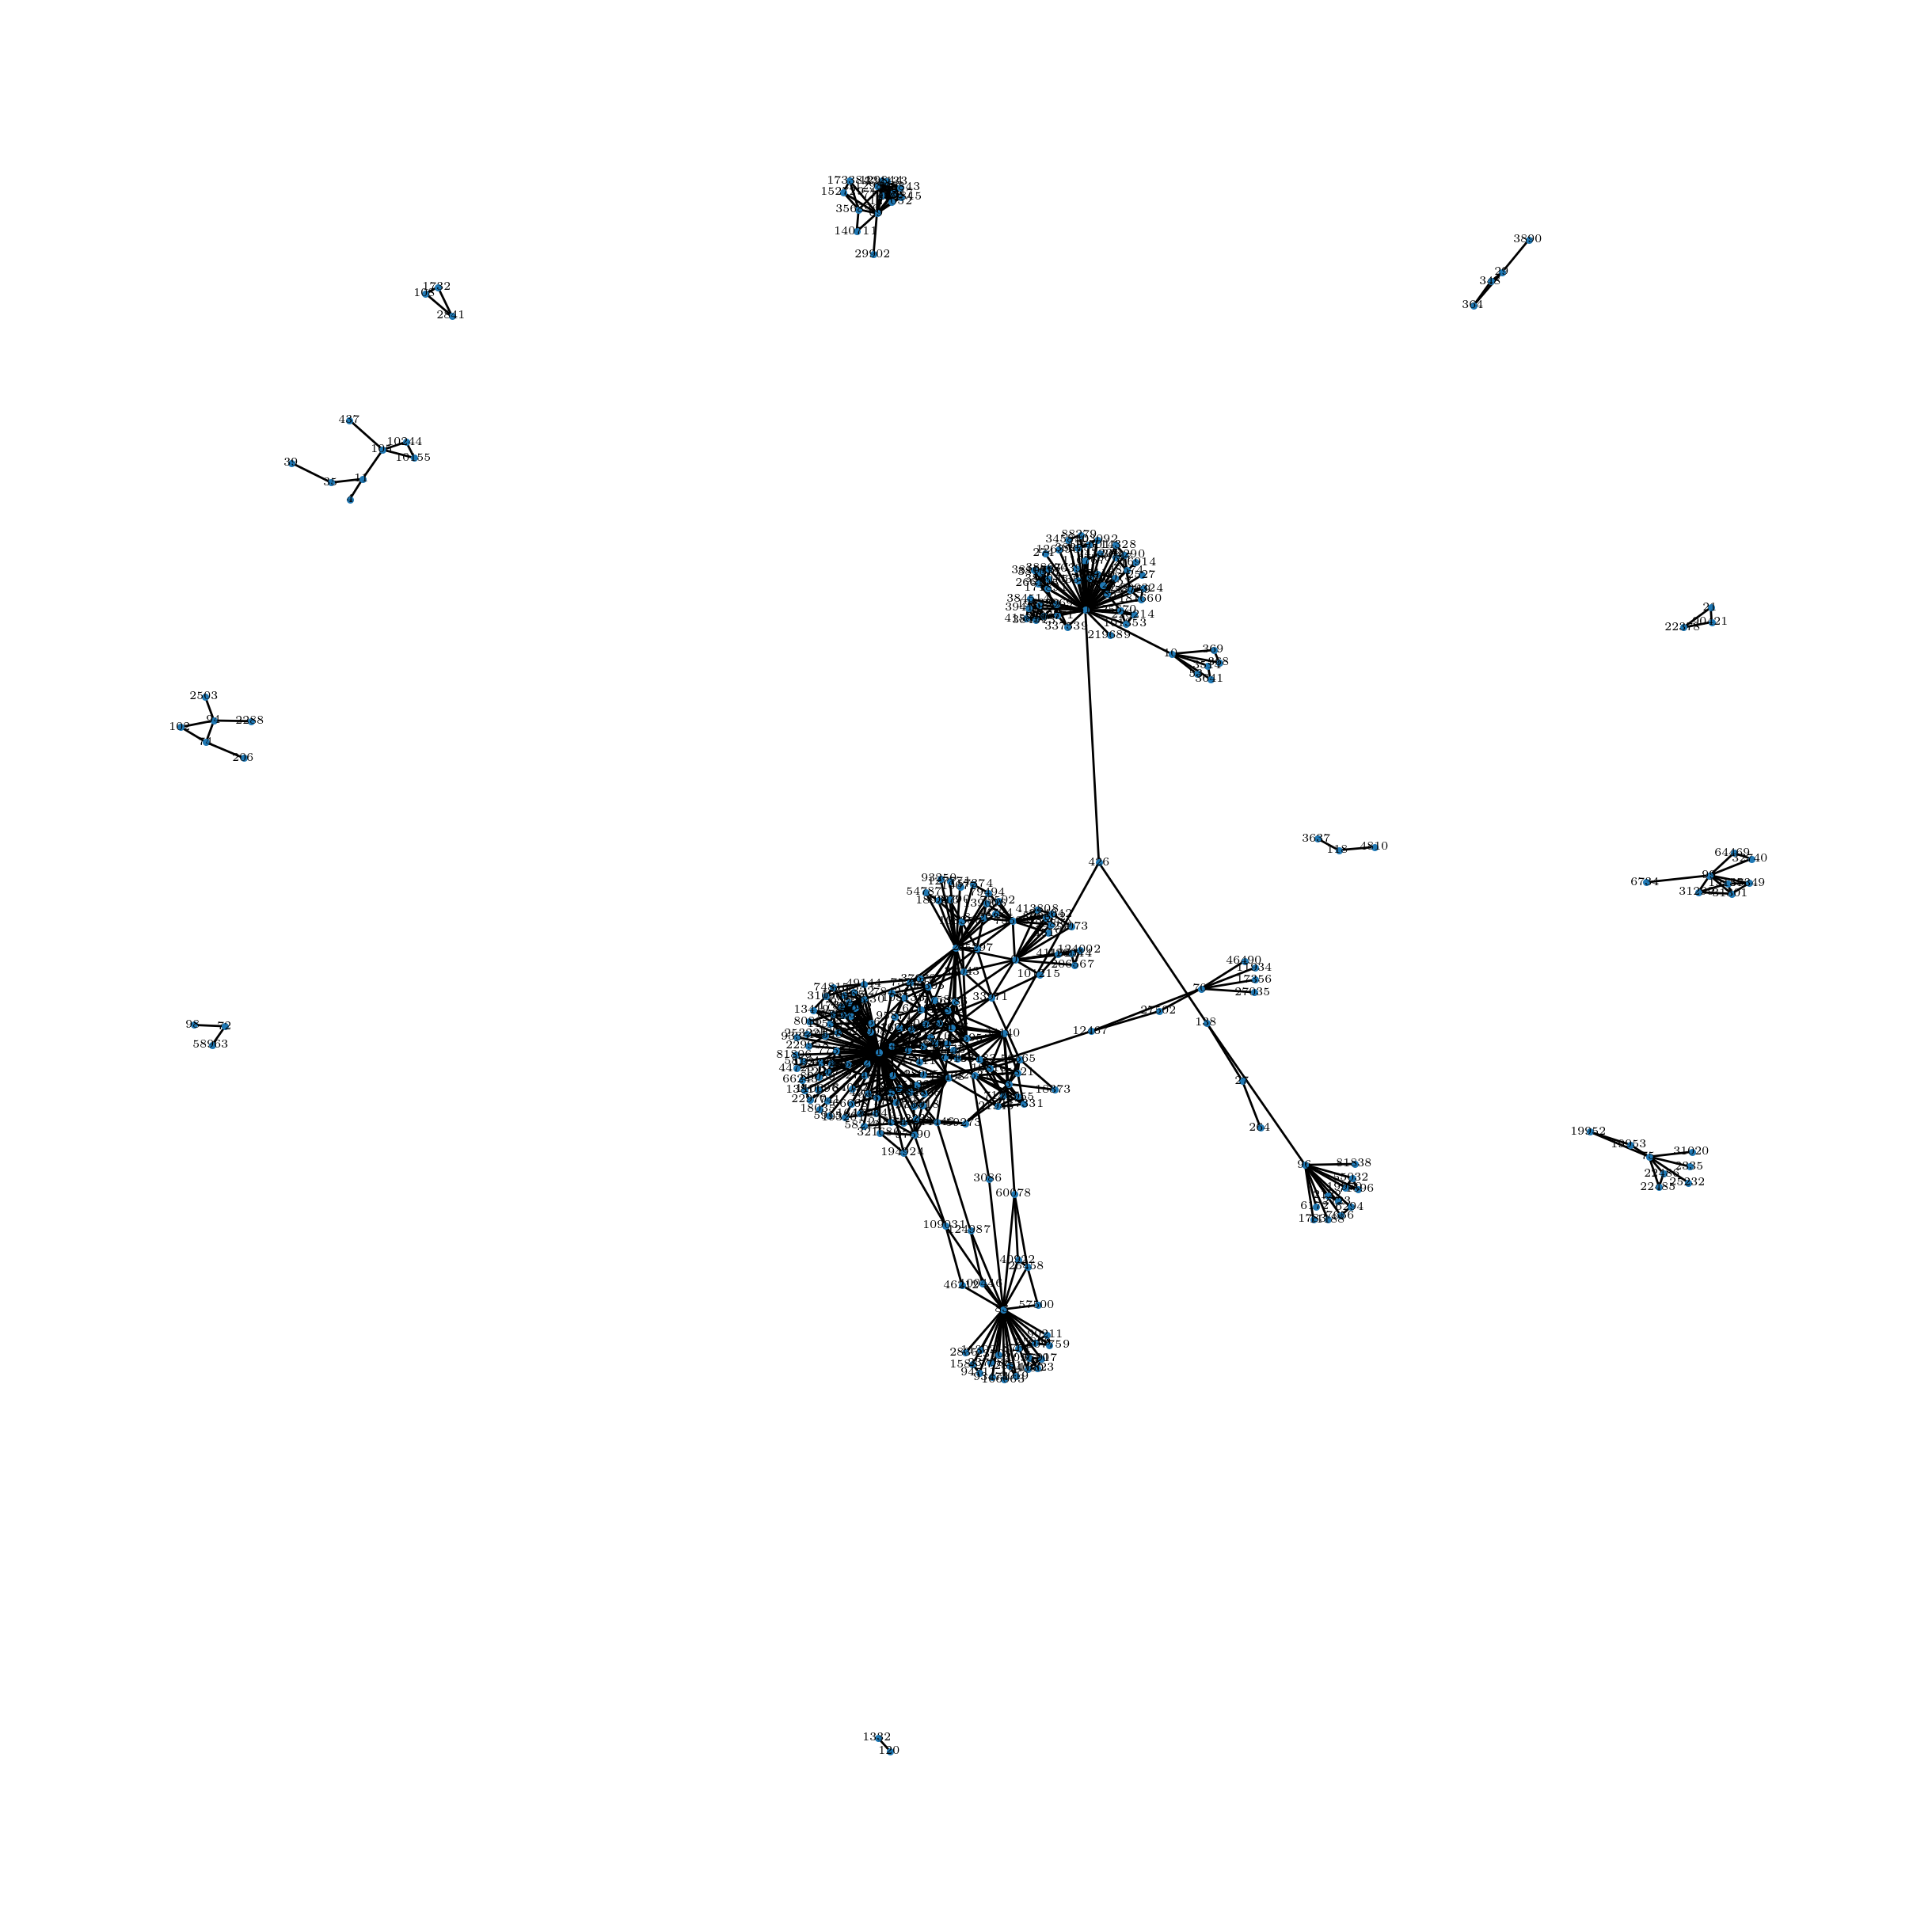

dblp.html
Number of Nodes:  317080
Number of Edges:  1049866
Number of Communities:  11760
Average Degree:  6.622089062697111
Average Clustering Coefficient:  0.6324308280637396


In [53]:
G = loadGraph("./Networks/DBLP/com-dblp.ungraph.txt")
community = loadCommunity("./Networks/DBLP/com-dblp.all.cmty.txt")
G = combineGraph(G, community)  

GDraw = nx.Graph(G.subgraph(list(G.nodes())[:300]))
plt.figure(figsize = (12, 12))
nx.draw(GDraw, with_labels = True, node_size = 5, font_size = 5)
plt.show()

nt = Network(height = "1080px", width = "100%", notebook = True, cdn_resources = "remote")
nt.from_nx(GDraw)
nt.show("dblp.html")

print("Number of Nodes: ", G.number_of_nodes())
print("Number of Edges: ", G.number_of_edges())
print("Number of Communities: ", len(set(community.values())))
print("Average Degree: ", np.mean(list(dict(G.degree()).values())))
print("Average Clustering Coefficient: ", nx.average_clustering(G))

In [ ]:
GDP = loadGraph("./Networks/DBLP/com-dblp.ungraph.txt")
communityDP = loadCommunity("./Networks/DBLP/com-dblp.all.cmty.txt")
GDP = combineGraph(GDP, communityDP)

# **Amazon Co-Purchase**

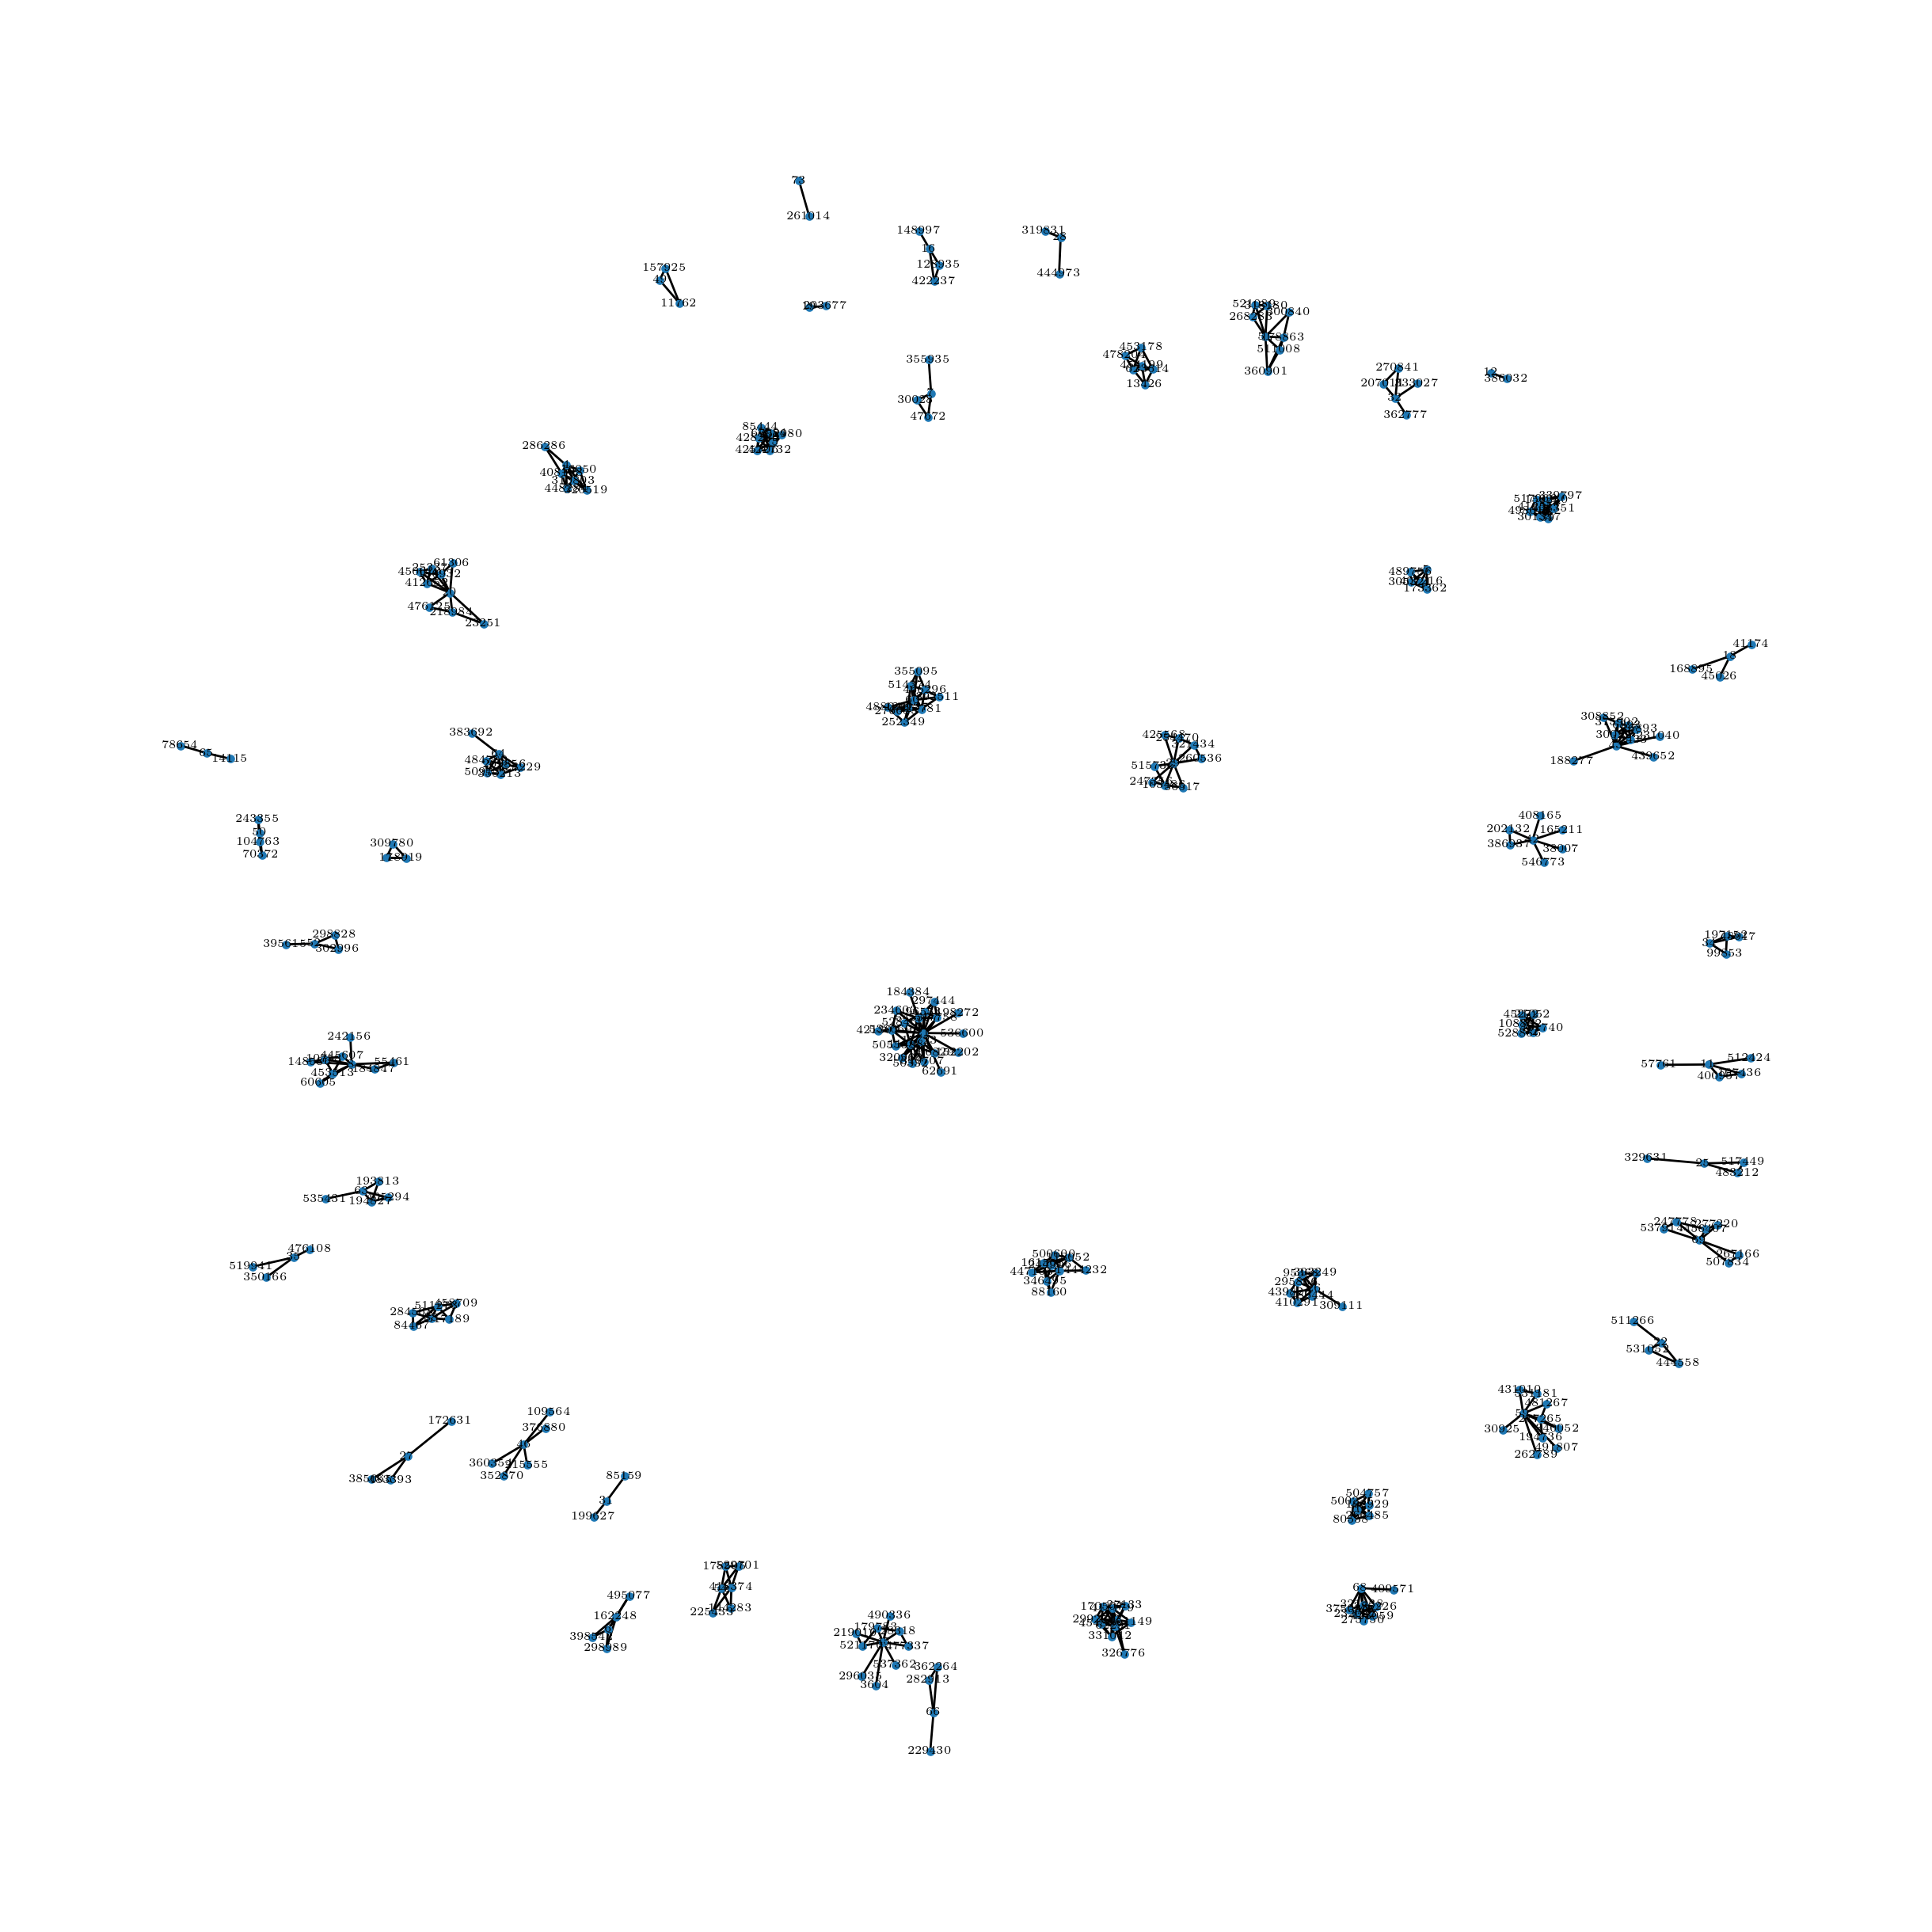

amazon.html
Number of Nodes:  334863
Number of Edges:  925872
Number of Communities:  23020
Average Degree:  5.529855493141971
Average Clustering Coefficient:  0.3967463932787655


In [55]:
G = loadGraph("./Networks/AmazonCoPurchase/com-amazon.ungraph.txt")
community = loadCommunity("./Networks/AmazonCoPurchase/com-amazon.all.dedup.cmty.txt")
G = combineGraph(G, community)

GDraw = nx.Graph(G.subgraph(list(G.nodes())[:300]))
plt.figure(figsize = (12, 12))
nx.draw(GDraw, with_labels = True, node_size = 8, font_size = 5)
plt.show()

nt = Network(height = "1080px", width = "100%", notebook = True, cdn_resources = "remote")
nt.from_nx(GDraw)
nt.show("amazon.html")

print("Number of Nodes: ", G.number_of_nodes())
print("Number of Edges: ", G.number_of_edges())
print("Number of Communities: ", len(set(community.values())))
print("Average Degree: ", np.mean(list(dict(G.degree()).values())))
print("Average Clustering Coefficient: ", nx.average_clustering(G))

In [ ]:
GAz = loadGraph("./Networks/AmazonCoPurchase/com-amazon.ungraph.txt")
communityAz = loadCommunity("./Networks/AmazonCoPurchase/com-amazon.all.dedup.cmty.txt")
GAz = combineGraph(GAz, communityAz)

# **YouTube**

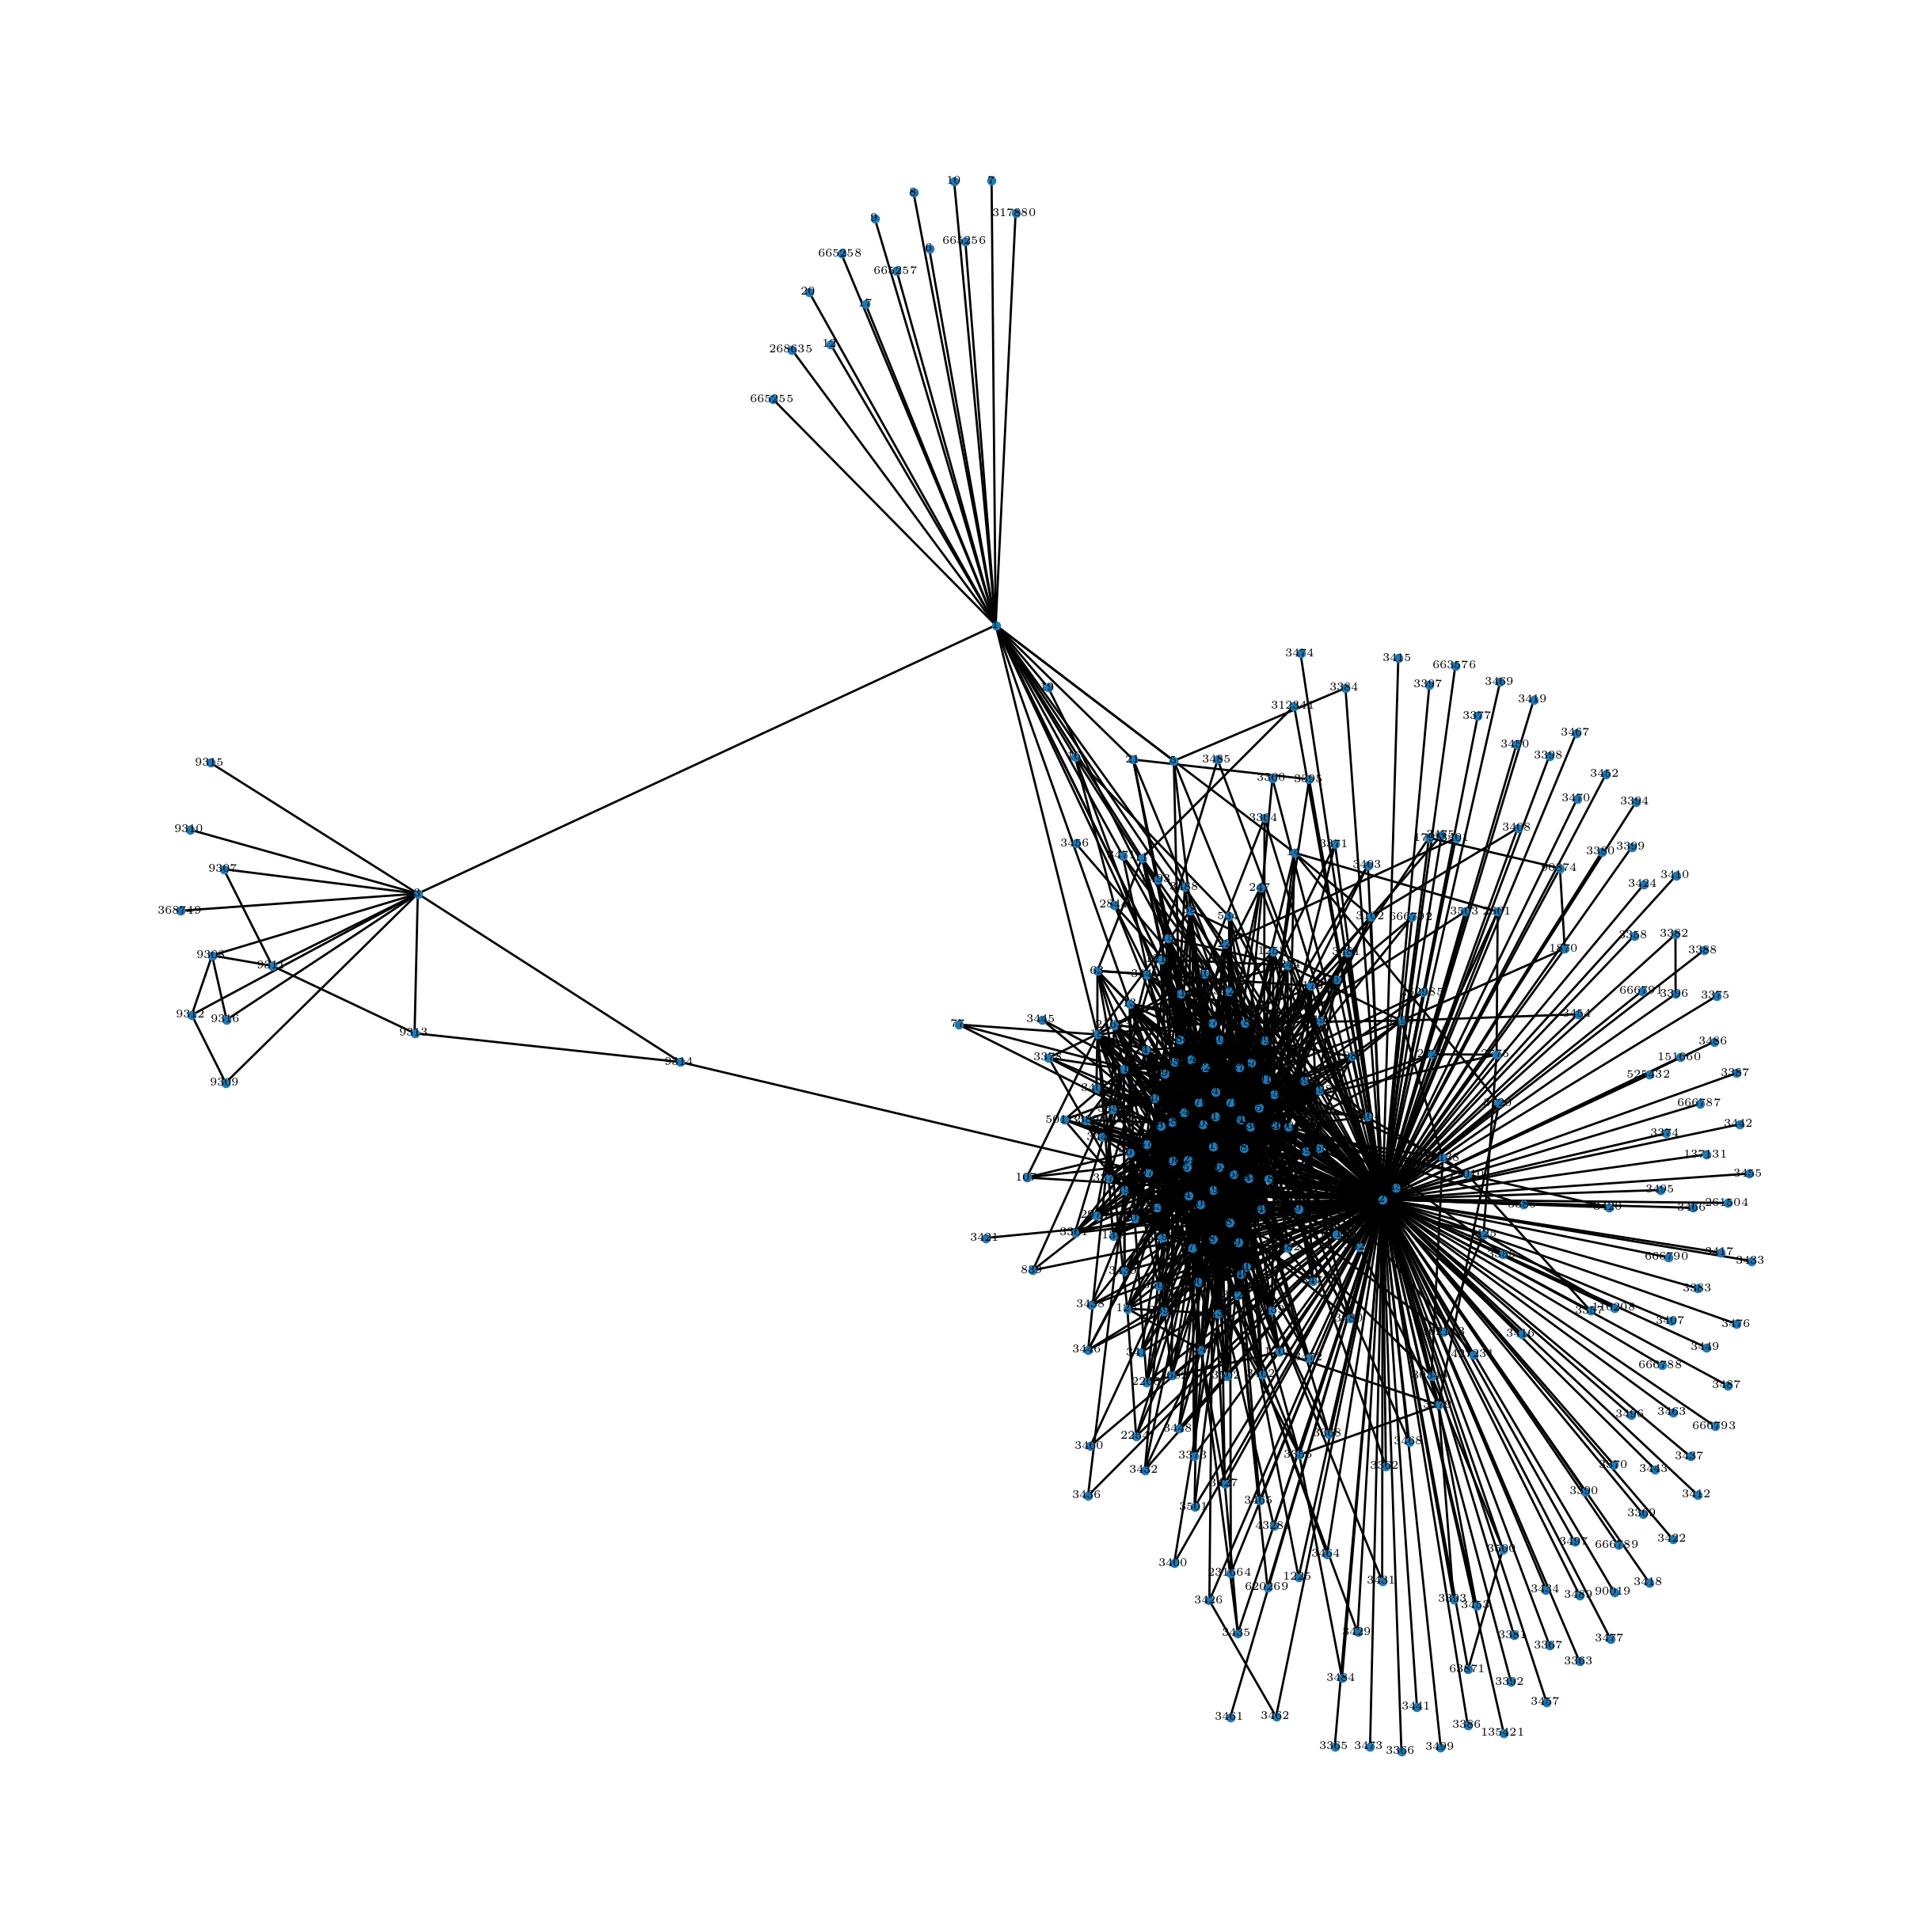

youtube.html
Number of Nodes:  1134890
Number of Edges:  2987624
Number of Communities:  12411
Average Degree:  5.265045951590022
Average Clustering Coefficient:  0.08080227776187864


In [57]:
G = loadGraph("./Networks/YouTube/com-youtube.ungraph.txt")
community = loadCommunity("./Networks/YouTube/com-youtube.all.cmty.txt")
G = combineGraph(G, community)  

GDraw = nx.Graph(G.subgraph(list(G.nodes())[:300]))
plt.figure(figsize = (12, 12))
nx.draw(GDraw, with_labels = True, node_size = 10, font_size = 5)
plt.show()

nt = Network(height = "1080px", width = "100%", notebook = True, cdn_resources = "remote")
nt.from_nx(GDraw)
nt.show("youtube.html")

print("Number of Nodes: ", G.number_of_nodes())
print("Number of Edges: ", G.number_of_edges())
print("Number of Communities: ", len(set(community.values())))
print("Average Degree: ", np.mean(list(dict(G.degree()).values())))
print("Average Clustering Coefficient: ", nx.average_clustering(G))

In [ ]:
GYT = loadGraph("./Networks/YouTube/com-youtube.ungraph.txt")
communityYT = loadCommunity("./Networks/YouTube/com-youtube.all.cmty.txt")
GYT = combineGraph(GYT, communityYT)